## Assignment – High Frequency Words

Author: Jiaxin Zheng

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## About data:
- This data is a full text datset of book "Pride and Prejudice" by Jane Austen. sourced from Project Gutenberg. https://www.gutenberg.org/ebooks/1342. It contains over 120,000 words.

In [85]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import networkx as nx
from collections import defaultdict
from itertools import combinations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
#read the text file from url github
url = 'https://raw.githubusercontent.com/Jennyjjxxzz/Data_620_Week8/main/Pride%20and%20Prejudice.txt'
response = requests.get(url)

text = response.text.lower()  # convert to lowercase

print(text[:1000])

﻿the project gutenberg ebook of pride and prejudice
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: pride and prejudice

author: jane austen

release date: june 1, 1998 [ebook #1342]
                most recently updated: october 29, 2024

language: english

credits: chuck greif and the online distributed proofreading team at http://www.pgdp.net (this file was produced from images available at the internet archive)


*** start of the project gutenberg ebook pride and prejudice ***
                            [illustration:

                             george allen
                    

In [87]:
# Clean the data
start_marker = "*** start of the project gutenberg ebook pride and prejudice ***"
end_marker = "*** end of the project gutenberg ebook pride and prejudice ***"
start_idx = text.find(start_marker)
end_idx = text.find(end_marker)

if start_idx != -1 and end_idx != -1:
    text = text[start_idx + len(start_marker):end_idx].strip()

In [88]:
# Tokenize words
tokenizer = RegexpTokenizer(r'\b\w+\b')
tokens = tokenizer.tokenize(text)

## Clean the data, remove stopwords

In [89]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_exclude]

## Number of unique words
- There are total 6895 unique words

In [90]:
freq_dist = FreqDist(filtered_tokens)
total_words = sum(freq_dist.values())

unique_word_count = len(freq_dist)
unique_word_count

6893

## Number of unique words that make up half the corpus

In [91]:
cumulative = 0
num_words_half = 0
for word, count in freq_dist.most_common():
    cumulative += count
    num_words_half += 1
    if cumulative >= total_words / 2:
        break
print("Unique Words to Reach 50% of Total:", num_words_half)

Unique Words to Reach 50% of Total: 315


## Top 200 frequent word
- Shows the top 20 most frequently used meaningful words. Character names like mr, elizabeth, and darcy dominate the narrative, reflecting the focus of the story.

In [99]:
print("Top 200 Frequent Words:\n", top_200_df)

Top 200 Frequent Words:
           word  count  relative_frequency
0           mr    807            0.013752
1    elizabeth    645            0.010991
2        could    530            0.009032
3        would    482            0.008214
4        darcy    430            0.007328
..         ...    ...                 ...
195    meryton     57            0.000971
196          _     55            0.000937
197      pride     55            0.000937
198       took     55            0.000937
199  pemberley     55            0.000937

[200 rows x 3 columns]


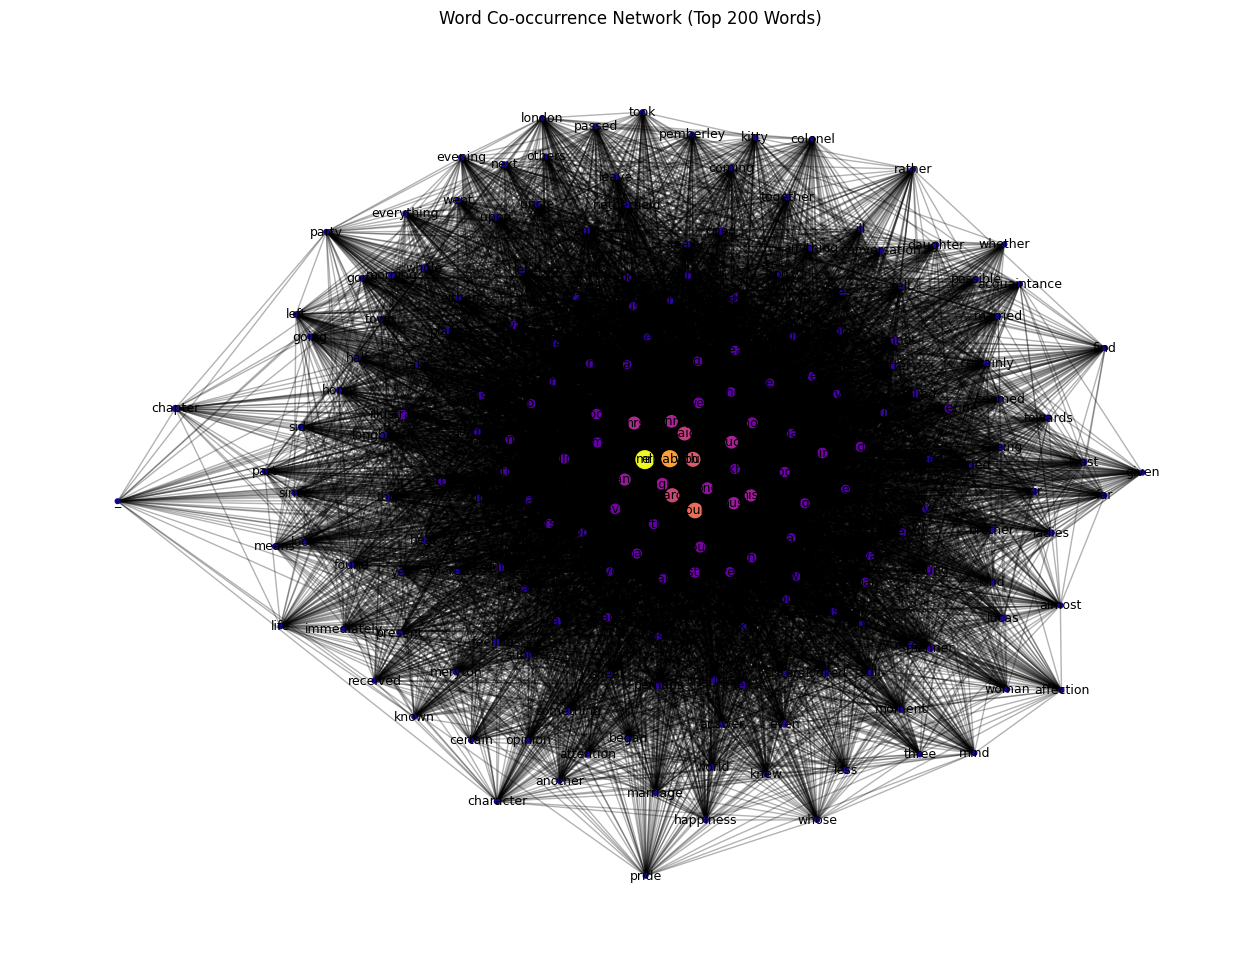

In [93]:
freq_dist = FreqDist(filtered_tokens)
top_200_df = pd.DataFrame(freq_dist.most_common(200), columns=["word", "count"])
top_words_set = set(top_200_df["word"])
# Co-occurrence calculation
window_size = 5
co_occurrence = defaultdict(int)
for i in range(len(filtered_tokens) - window_size + 1):
    window = filtered_tokens[i:i + window_size]
    filtered_window = [word for word in window if word in top_words_set]
    for word1, word2 in combinations(set(filtered_window), 2):
        if word1 != word2:
            pair = tuple(sorted((word1, word2)))
            co_occurrence[pair] += 1

# Build graph
G = nx.Graph()
for (word1, word2), weight in co_occurrence.items():
    if weight > 2:  # filter weak edges
        G.add_edge(word1, word2, weight=weight)

# Draw network
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=[freq_dist[w]*0.2 for w in G.nodes()],
                       node_color=[freq_dist[w] for w in G.nodes()], cmap=plt.cm.plasma)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=9)
plt.title("Word Co-occurrence Network (Top 200 Words)")
plt.axis('off')
plt.show()

In [94]:
# Top 10 words in the network by number of connections (degree centrality)
degree_dict = dict(G.degree())
top_10_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:20]
print("\n🔗 Top 10 Words by Connections in Co-occurrence Network:")
for word, degree in top_10_nodes:
    print(f"{word}: {degree} connections")



🔗 Top 10 Words by Connections in Co-occurrence Network:
mr: 199 connections
elizabeth: 192 connections
could: 191 connections
would: 187 connections
said: 185 connections
much: 180 connections
darcy: 180 connections
mrs: 179 connections
one: 176 connections
jane: 173 connections
miss: 173 connections
must: 171 connections
bennet: 168 connections
know: 162 connections
bingley: 161 connections
never: 161 connections
well: 158 connections
soon: 156 connections
wickham: 155 connections
good: 154 connections


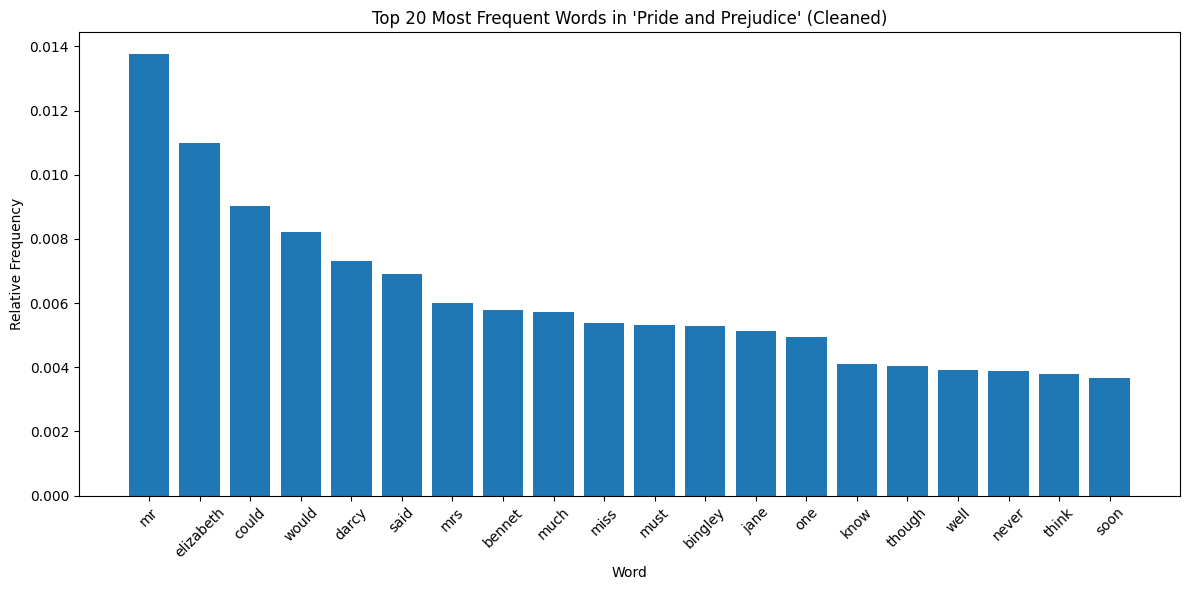

In [97]:
# Barplot of Top 20 Words
top_200_df = pd.DataFrame(freq_dist.most_common(200), columns=["word", "count"])
top_200_df["relative_frequency"] = top_200_df["count"] / total_words

top_20_df = top_200_df.head(20)
plt.figure(figsize=(12, 6))
plt.bar(top_20_df["word"], top_20_df["relative_frequency"])
plt.title("Top 20 Most Frequent Words in 'Pride and Prejudice' (Cleaned)")
plt.xlabel("Word")
plt.ylabel("Relative Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Zipf's Law Log-Log Plot
- The first few words (e.g., “mr”, “elizabeth”, “said”) are very frequent as you go further down the rank, word frequency drops sharply

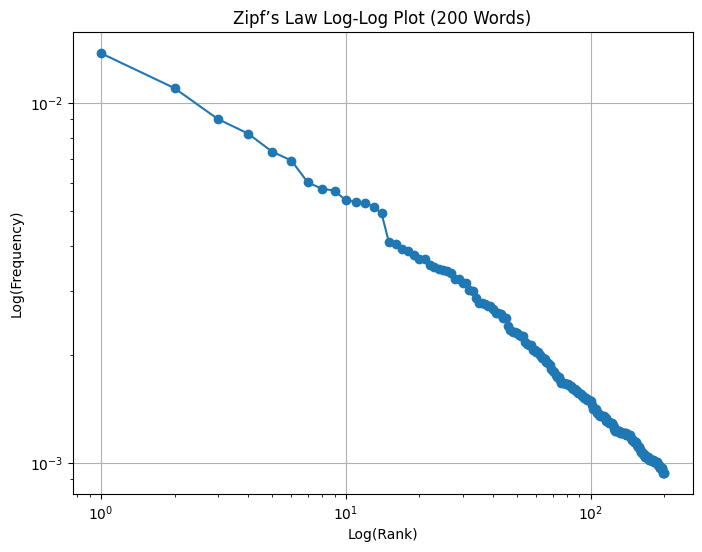

In [102]:
# Zipf’s Law Log-Log Plot
plt.figure(figsize=(8, 6))
plt.loglog(range(1, 201), top_200_df["relative_frequency"].values[:200], marker='o')
plt.title("Zipf’s Law Log-Log Plot (200 Words)")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.grid(True)
plt.show()

## Observations (After Removing Stopwords):
- More meaningful nouns and verbs rise to the top (e.g., character names, key actions).
- Better reflection of the actual content and themes of the novel.
- Zipf’s law still generally holds with cleaned vocabulary.

